<a href="https://colab.research.google.com/github/Da23849156/PING-HAN-TSAI/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**嘗試一（與老師先前教導的程式不同）**
##1. 改變convolution layer和各層神經元數
##2. loss function使用categorical_crossentropy而非mse
有學者認為categorical_crossentropy相較於mse 在使用softmax函數時，訓練後期較容易讓正確率進步。
##3. SGD 的learning rate改成0.01
先前嘗試過0.87，但不是太好，所以將lr調小一點
##4. 使用he_uniform作為initializers
因為不認為資料為常態分配，所以使用這個。但其實我不太確定這個東西的概念QQ
##5. 改變batch size為32 epochs為10

In [0]:
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
x_train_new=x_train.reshape(60000,28,28,1)/255

In [0]:
x_test_new=x_test.reshape(10000,28,28,1)/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train_new=to_categorical(y_train,10)

In [0]:
y_test=to_categorical(y_test,10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam,SGD

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

In [0]:
model.add(MaxPooling2D((2, 2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

In [0]:
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [0]:
	model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
history=model.fit(x_train_new,y_train_new,batch_size=32,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5599 - accuracy: 0.7993
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4097 - accuracy: 0.8548
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3639 - accuracy: 0.8708
Epoch 4/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.3340 - accuracy: 0.8802
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3119 - accuracy: 0.8886
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2958 - accuracy: 0.8939
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2802 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2691 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2595 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 39s 21m

In [45]:
result = model.predict_classes(x_test_new)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def my_predict(n):
    print('我可愛的 CNN 預測是', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    pyplot.imshow(X, cmap='Greys')

In [0]:
from ipywidgets import interact_manual

In [48]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>

In [49]:
score = model.evaluate(x_test_new, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2842 - accuracy: 0.8948


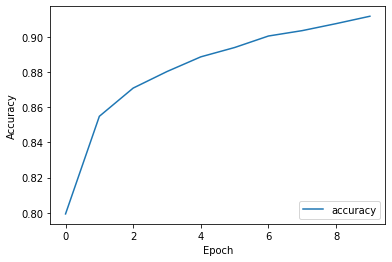

In [50]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(loc='lower right')

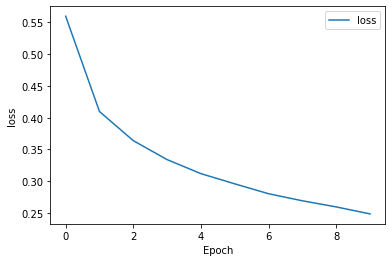

In [51]:
pyplot.plot(history.history['loss'], label='loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('loss')
pyplot.legend(loc='upper right')

#**結果顯示模型應稍微有overfitting的情況**
##**Train accuracy:91%**
##**Test accuracy:89%**



# **嘗試二**
## 1. 增加validation set
方便挑選模型，避免overfitting的情況
## 2. 改變learning rate（從0.01變成0.1)

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()


In [0]:
x_valid=x_train[:6000]/255

In [0]:
y_valid=y_train[:6000]

In [0]:
x_train_new=x_train[6000:]/255

In [0]:
y_train_new=y_train[6000:]

In [0]:
y_train_new = to_categorical(y_train_new, 10)
y_valid=to_categorical(y_valid,10)
y_test = to_categorical(y_test, 10)

In [0]:
x_train_new=x_train_new.reshape(54000,28,28,1)

In [0]:
x_test_new=x_test.reshape(10000,28,28,1)/255

In [0]:
x_valid=x_valid.reshape(6000,28,28,1)

In [0]:
model2 = Sequential()

In [0]:
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

In [0]:
model2.add(MaxPooling2D((2, 2)))

In [0]:
model2.add(Flatten())

In [0]:
model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

In [0]:
model2.add(Dense(10, activation='softmax'))

In [67]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [0]:
	model2.compile(optimizer=SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [69]:
response=model2.fit(x_train_new,y_train_new,batch_size=32,epochs=10,validation_data=(x_valid,y_valid))

Epoch 1/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.5192 - accuracy: 0.8173 - val_loss: 0.4564 - val_accuracy: 0.8388
Epoch 2/10
1688/1688 [==============================] - 36s 22ms/step - loss: 0.3992 - accuracy: 0.8550 - val_loss: 0.4336 - val_accuracy: 0.8500
Epoch 3/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.3655 - accuracy: 0.8681 - val_loss: 0.4460 - val_accuracy: 0.8390
Epoch 4/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.3376 - accuracy: 0.8766 - val_loss: 0.3917 - val_accuracy: 0.8612
Epoch 5/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.3186 - accuracy: 0.8836 - val_loss: 0.3989 - val_accuracy: 0.8627
Epoch 6/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.3084 - accuracy: 0.8886 - val_loss: 0.4684 - val_accuracy: 0.8523
Epoch 7/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.3001 - accuracy: 0.8926 - val_loss: 0.4395 -

In [0]:
result = model2.predict_classes(x_test_new)


In [0]:
def my_predict(n):
    print('我可愛的 CNN 預測是', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    pyplot.imshow(X, cmap='Greys')

In [0]:
from ipywidgets import interact_manual

In [73]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>

In [74]:
score = model2.evaluate(x_test_new, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.5389 - accuracy: 0.8265


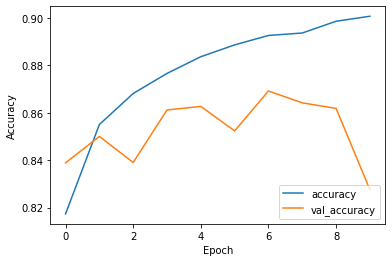

In [75]:
pyplot.plot(response.history['accuracy'], label='accuracy')
pyplot.plot(response.history['val_accuracy'], label = 'val_accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(loc='lower right')

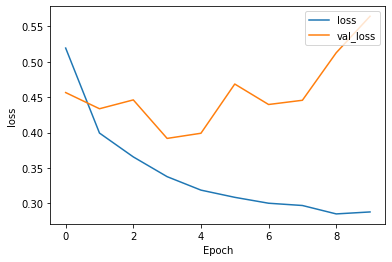

In [76]:
pyplot.plot(response.history['loss'], label='loss')
pyplot.plot(response.history['val_loss'], label = 'val_loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('loss')
pyplot.legend(loc='upper right')

##**結果顯示，相較於上個模型，這次模型出現更大幅度overfitting的情況QQ**
#**Train accuracy:90%**
#**Val accurary:83%**
#**Test accuracy:83%**

#**嘗試三** （相較於嘗試二）
##1. 改變optimizers（從SGD換成Adam)
adam為目前常使用的optimizer之一，能使學習率有個固定範圍，讓參數更新較平穩
##2. 改變layers層數
更改地方：使用7層convolution layers,3層maxpooling,3層dense
##3. 改變batch size和epochs（只是想訓練快一點XDD）
batch=512
epochs=20
##4. learning rate維持與嘗試二雷同

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()


In [0]:
x_valid=x_train[:6000]/255

In [0]:
y_valid=y_train[:6000]

In [0]:
x_train_new=x_train[6000:]/255

In [0]:
y_train_new=y_train[6000:]

In [0]:
y_train_new = to_categorical(y_train_new, 10)
y_valid=to_categorical(y_valid,10)
y_test = to_categorical(y_test, 10)

In [0]:
x_train_new=x_train_new.reshape(54000,28,28,1)

In [0]:
x_test_new=x_test.reshape(10000,28,28,1)/255

In [0]:
x_valid=x_valid.reshape(6000,28,28,1)

In [0]:
model3 = Sequential([Conv2D(32, (7, 7), activation='relu', kernel_initializer='he_uniform',padding='same' ,input_shape=(28, 28, 1)),
                     MaxPooling2D((2, 2)),
                     Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'),
                     Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'),
                     MaxPooling2D((2, 2)),
                     Flatten(),
                     Dense(128,activation='relu'),
                     Dropout(0.5),
                     Dense(64,activation='relu'),
                     Dropout(0.5),
                     Dense(10,activation='softmax')
                     ])

In [113]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)              

In [0]:
	model3.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


In [116]:
response=model3.fit(x_train_new,y_train_new,batch_size=512,epochs=5,validation_data=(x_valid,y_valid))

Epoch 1/5
106/106 [==============================] - 139s 1s/step - loss: 0.5273 - accuracy: 0.8150 - val_loss: 0.3605 - val_accuracy: 0.8682
Epoch 2/5
106/106 [==============================] - 142s 1s/step - loss: 0.4766 - accuracy: 0.8354 - val_loss: 0.3515 - val_accuracy: 0.8692
Epoch 3/5
106/106 [==============================] - 139s 1s/step - loss: 0.4462 - accuracy: 0.8437 - val_loss: 0.3301 - val_accuracy: 0.8783
Epoch 4/5
106/106 [==============================] - 138s 1s/step - loss: 0.4252 - accuracy: 0.8524 - val_loss: 0.3282 - val_accuracy: 0.8785
Epoch 5/5
106/106 [==============================] - 138s 1s/step - loss: 0.4231 - accuracy: 0.8550 - val_loss: 0.3132 - val_accuracy: 0.8872


In [0]:
result = model3.predict_classes(x_test_new)


In [0]:
def my_predict(n):
    print('我可愛的 CNN 預測是', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    pyplot.imshow(X, cmap='Greys')

In [0]:
from ipywidgets import interact_manual

In [120]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>

In [121]:
score = model2.evaluate(x_test_new, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.5389 - accuracy: 0.8265


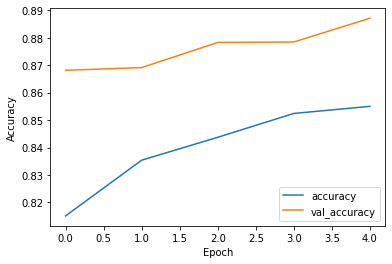

In [122]:
pyplot.plot(response.history['accuracy'], label='accuracy')
pyplot.plot(response.history['val_accuracy'], label = 'val_accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(loc='lower right')

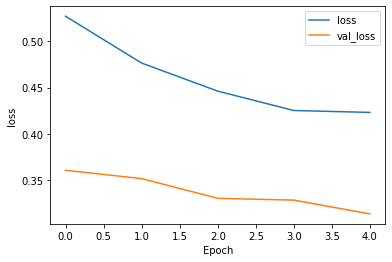

In [123]:
pyplot.plot(response.history['loss'], label='loss')
pyplot.plot(response.history['val_loss'], label = 'val_loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('loss')
pyplot.legend(loc='upper right')

# **結果顯示，也有overfitting的情況**
##**Train accuracy:85%**
##**validation accuracy:89%**
##**test accuracy: 82%**

# **總結：應該是嘗試一（模型一）具有最好的預測能力**